# Analyze Football league data

The dataset contains information about Premiere League football from 2012 to 2016

<h3>Variable Description</h3>


<b>FTHG</b>: Home team goals at end of match<br>
<b>FTAG</b>: Away team goals at end of match<br>
<b>FTR</b>: match result ([h, a, d] denote [home team victory, away team victory, draw] respectively)<br>
<b>HST</b>: Home team shots on target<br>
<b>AST</b>: Away team shots on target<br>
<b>HC</b>: Home team corner kicks<br>
<b>AC</b>: Away team corner kicks<br>
<b>HF</b>: Home team fouls<br>
<b>AF</b>: Away team fouls<br>
<b>HY</b>: Home team yellow cards<br>
<b>AY</b>: Away team yellow cards<br>
<b>HR</b>: Home team red cards<br>
<b>AR</b>: Away team red cards<br>
<br>

<h3>Exploration Ideas</h3>

1. Summary Stats: Matches, Teams, Referees, %home win, %away win
2. Relegation Analysis
3. Best/ Worst performing teams
4. Playing styles: Fouls, Shots


In [1]:
# all imports 
# pandas and numpy for loading data into dataframs from files and other numerical functions
# matplotlib for visualization

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

% matplotlib inline

# Loading Data in Python Dataframes

In [2]:
#read files stored @ D:\DataScience\ProjectData\Project_2_FootballLeaguedata
#Data files different based on year, read all of available data files into different dataframes

file_loc = "D:/DataScience/ProjectData/Project_2_FootballLeaguedata/"
file_name = "2012-13.csv"

fl_1213data = pd.read_csv(file_loc+file_name, sep=',')

file_name = "2013-14.csv"

fl_1314data = pd.read_csv(file_loc+file_name, sep=',')

file_name = "2014-15.csv"

fl_1415data = pd.read_csv(file_loc+file_name, sep=',')

file_name = "2015-16.csv"

fl_1516data = pd.read_csv(file_loc+file_name, sep=',')

In [3]:
# Adding column for year

fl_1213data['Year'] = '2012-13'
fl_1314data['Year'] = '2013-14'
fl_1415data['Year'] = '2014-15'
fl_1516data['Year'] = '2015-16'


In [4]:
# Merge the yearwise files into single

combined1214 = fl_1213data.append(fl_1314data)
combined1215 = combined1214.append(fl_1415data)
fl_data = combined1215.append(fl_1516data)

In [5]:
# summary of the data (mean, STD, Min, Max)
fl_data.describe()

# how data is distributed 
#fl_data.info()

#top 5 rows from dataset
#fl_data.head()

#bottom 5 rows from dataset
#fl_data.tail()

#fl_data.columns

,AC,AF,AR,AS,AST,AY,B365A,B365D,B365H,BSA,...,PSH,SJA,SJD,SJH,VCA,VCD,VCH,WHA,WHD,WHH
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,380.000000,...,1520.000000,800.000000,800.000000,800.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,4.763158,11.155921,0.093421,11.398026,4.432237,1.785526,4.785934,4.022112,2.699013,4.494605,...,2.720401,4.761275,3.954300,2.638637,4.822091,3.999336,2.705318,4.581053,3.587750,2.664099
std,2.637994,3.511108,0.304383,4.681438,2.684780,1.280862,3.638906,1.018387,1.549270,3.120471,...,1.574785,3.659769,0.932057,1.529224,3.678113,0.981258,1.537709,3.369899,0.740878,1.463045
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.330000,3.100000,1.130000,1.400000,...,1.130000,1.330000,3.000000,1.110000,1.360000,2.500000,1.140000,1.360000,2.800000,1.120000
25%,3.000000,9.000000,0.000000,8.000000,3.000000,1.000000,2.437500,3.400000,1.700000,2.500000,...,1.690000,2.400000,3.400000,1.620000,2.450000,3.400000,1.700000,2.400000,3.100000,1.700000
50%,4.000000,11.000000,0.000000,11.000000,4.000000,2.000000,3.500000,3.600000,2.200000,3.400000,...,2.200000,3.500000,3.600000,2.100000,3.600000,3.600000,2.200000,3.400000,3.300000,2.225000
75%,6.000000,14.000000,0.000000,14.000000,6.000000,3.000000,5.500000,4.200000,3.100000,5.500000,...,3.130000,5.500000,4.000000,3.000000,5.500000,4.200000,3.100000,5.500000,3.750000,3.000000
max,17.000000,24.000000,2.000000,30.000000,20.000000,9.000000,29.000000,11.000000,11.000000,19.000000,...,10.800000,21.000000,8.500000,9.000000,23.000000,9.500000,10.500000,26.000000,8.000000,10.000000


# Summary Stats

In [241]:
#Total Number of Matches
tot_matches = len(fl_data)
print("no.of matches:"+str(tot_matches))

#Matches won by Home Team

hom_win = fl_data.loc[fl_data['FTR']=='H']

hom_win_count = len(hom_win)

hom_win_percent = hom_win_count / tot_matches * 100

#Matches won by Away Team

awy_win = fl_data.loc[fl_data['FTR']=='A']

awy_win_count = len(awy_win)

awy_win_percent = awy_win_count / tot_matches * 100


#Matches drawn

drw = fl_data.loc[fl_data['FTR']=='D']

drw_count = len(drw)

drw_percent = drw_count / tot_matches * 100


print('No. of matches when Home team wins ' + str(hom_win_count) + ' that is ~' + str(int('%d' %hom_win_percent)) +'% times.')
print('No. of matches when Away team wins ' + str(awy_win_count) + ' that is ~' + str(int('%d' %awy_win_percent)) +'% times.')
print('No. of matches when there was no result, i.e., Match was Draw ' + str(drw_count) + ' that is ~' + str(int('%d' %drw_percent)) +'% times.')



no.of matches:1521
No. of matches when Home team wins 674 that is ~44% times.
No. of matches when Away team wins 460 that is ~30% times.
No. of matches when there was no result, i.e., Match was Draw 386 that is ~25% times.


In [242]:
#Unique Teams played in tournament

uniq_teams = pd.unique(fl_data[['HomeTeam','AwayTeam']].values.ravel('K'))
uniq_team_count = len(uniq_teams)

uniq_team_count

28

# Refree Performance Summary 

In [243]:
# count number matches for each refree

fl_refrees = fl_data.groupby('Referee').size()

fl_refrees.sort_values(ascending=False)

fl_refree_stats = fl_data.groupby(['Year','Referee','FTR']).size().unstack().reset_index()

fl_refree_stats

ref_perf_HWin = fl_refree_stats.sort_values(by=['H','Referee'],ascending=False, inplace=False)
ref_perf_AWin = fl_refree_stats.sort_values(by=['A','Referee'],ascending=False, inplace=False)
ref_perf_Draw = fl_refree_stats.sort_values(by=['Year','D','Referee'],ascending=False, inplace=False).groupby('Year')

ref_perf_HWin
ref_perf_AWin
ref_perf_Draw.head()


FTR,Year,Referee,A,D,H
60,2015-16,C Pawson,5.0,14.0,9.0
70,2015-16,M Oliver,8.0,10.0,8.0
66,2015-16,M Atkinson,9.0,10.0,10.0
68,2015-16,M Dean,4.0,9.0,20.0
69,2015-16,M Jones,10.0,8.0,10.0
49,2014-15,M Dean,7.0,11.0,11.0
47,2014-15,M Atkinson,7.0,11.0,14.0
51,2014-15,M Oliver,7.0,8.0,13.0
42,2014-15,J Moss,9.0,8.0,13.0
53,2014-15,P Dowd,7.0,7.0,7.0


# Relegation Analysis

In [244]:
# Group by HomeTeam/ AwayTeam, Year and FTR to get Yearly Stats for each team

home_stat_yearly = fl_data.groupby(['HomeTeam','Year','FTR']).size().unstack().reset_index()

away_stat_yearly = fl_data.groupby(['AwayTeam','Year','FTR']).size().unstack().reset_index()

#assign point - 3 points when win, 1 point when draw

home_stat_yearly['Point'] = home_stat_yearly['H']*3 + home_stat_yearly['D']*1

away_stat_yearly['Point'] = away_stat_yearly['A']*3 + away_stat_yearly['D']*1

#Merge the stats for home and away matches

team_stats_yearly = home_stat_yearly.merge(away_stat_yearly,how='outer',left_on=['HomeTeam', 'Year'], right_on=['AwayTeam', 'Year'] ,sort=True)
                
#Get total points earned by each team playing by adding points earned at Home and Away

team_stats_yearly['TotalPoints'] = team_stats_yearly['Point_x'] + team_stats_yearly['Point_y']

#Top 3 Teams Yearwise

bestTeamYearly = team_stats_yearly.sort_values(by=['Year','TotalPoints'],ascending=False, inplace=False).groupby('Year').head(3)
homeHeadStatYearly = home_stat_yearly.sort_values(by=['Year','Point'],ascending=False, inplace=False).groupby('Year').head(3)
awayHeadStatYearly = away_stat_yearly.sort_values(by=['Year','Point'],ascending=False, inplace=False).groupby('Year').head(3)

#Bottom 3 Teams Yearwise

relegatedTeamYearly = team_stats_yearly.sort_values(by=['Year','TotalPoints'],ascending=True, inplace=False).groupby('Year').head(3)

homeTailStatYearly = home_stat_yearly.sort_values(by=['Year','Point'],ascending=True, inplace=False).groupby('Year').head(3)
awayTailStatYearly = away_stat_yearly.sort_values(by=['Year','Point'],ascending=True, inplace=False).groupby('Year').head(3)

#bestTeam_overall

bestTeam_overall = team_stats_yearly.groupby('HomeTeam').sum().reset_index().sort_values(by ='TotalPoints', ascending=False)
homeHead = home_stat_yearly.groupby('HomeTeam').sum().reset_index().sort_values(by ='Point', ascending=False)
homeTail = home_stat_yearly.groupby('HomeTeam').sum().reset_index().sort_values(by ='Point', ascending=True)
awayHead = away_stat_yearly.groupby('AwayTeam').sum().reset_index().sort_values(by ='Point', ascending=False)
awayTail = away_stat_yearly.groupby('AwayTeam').sum().reset_index().sort_values(by ='Point', ascending=True)

bestTeamYearly
relegatedTeamYearly
bestTeam_overall.head()


FTR,HomeTeam,A_x,D_x,H_x,Point_x,A_y,D_y,H_y,Point_y,TotalPoints
12,Man City,10.0,9.0,57.0,180.0,36,21,19,129,309.0
0,Arsenal,9.0,19.0,48.0,163.0,39,18,19,135,298.0
5,Chelsea,8.0,21.0,47.0,162.0,38,18,20,132,294.0
22,Tottenham,17.0,17.0,42.0,143.0,38,18,20,132,275.0
11,Liverpool,13.0,20.0,43.0,149.0,33,19,24,118,267.0


# Best/ Worst performing teams

In [245]:
# Best Team Yearwise
bestTeamYearly

#Relegated team Yearwise
relegatedTeamYearly

#Overall Top performers for all years
bestTeam_overall.head()
bestTeam_overall.tail()

#homeHeadStatYearly
#awayHeadStatYearly
#homeTailStatYearly
#awayTailStatYearly

#homeHead
#homeTail
#awayHead
#awayTail



FTR,HomeTeam,A_x,D_x,H_x,Point_x,A_y,D_y,H_y,Point_y,TotalPoints
2,Bournemouth,9.0,5.0,5.0,20.0,6,4,9,22,42.0
26,Wigan,9.0,6.0,4.0,18.0,5,3,11,18,36.0
3,Burnley,8.0,7.0,4.0,19.0,3,5,11,14,33.0
4,Cardiff,9.0,5.0,5.0,20.0,2,4,13,10,30.0
17,Reading,7.0,8.0,4.0,20.0,2,2,15,8,28.0


# Playing Style

In [246]:

#Foul, Yellow/ Red Card counts
#HF: Home team fouls
#AF: Away team fouls
#HY: Home team yellow cards
#AY: Away team yellow cards
#HR: Home team red cards
#AR: Away team red cards
    
fl_Hteam_playstyle = fl_data.groupby(['HomeTeam','FTR'], as_index=True)['HF','HY','HR'].mean().reset_index()
fl_Ateam_playstyle = fl_data.groupby(['AwayTeam','FTR'], as_index=True)['AF','AY','AR'].mean().reset_index()

fl_Hteam_playstyle
fl_Ateam_playstyle

fl_team_playstyle = fl_Hteam_playstyle.merge(fl_Ateam_playstyle, how='outer', left_on=['HomeTeam', 'FTR'], right_on=['AwayTeam', 'FTR'])

#Fouls when win, loose, draw 

fl_team_playstyle['DrawFouls'] = fl_team_playstyle['HF'].shift(-1).where(fl_team_playstyle.FTR == 'A', fl_team_playstyle.HF)
fl_team_playstyle['DrawFouls'] = (fl_team_playstyle['DrawFouls'] + fl_team_playstyle['AF'].shift(-1).where(fl_team_playstyle.FTR == 'A',0))/2

fl_team_playstyle['WinFouls'] = fl_team_playstyle['HF'].shift(-2).where(fl_team_playstyle.FTR == 'A', fl_team_playstyle.HF)
fl_team_playstyle['WinFouls'] = (fl_team_playstyle['WinFouls'] + fl_team_playstyle['AF'].where(fl_team_playstyle.FTR == 'A',0))/2

fl_team_playstyle['LooseFouls'] = fl_team_playstyle['HF'].where(fl_team_playstyle.FTR == 'A', 0)
fl_team_playstyle['LooseFouls'] = (fl_team_playstyle['LooseFouls'] + fl_team_playstyle['AF'].shift(-2).where(fl_team_playstyle.FTR == 'A',0))/2

#Yellow Card when win, loose, draw

fl_team_playstyle['DrawYCards'] = fl_team_playstyle['HY'].shift(-1).where(fl_team_playstyle.FTR == 'A', fl_team_playstyle.HY)
fl_team_playstyle['DrawYCards'] = (fl_team_playstyle['DrawYCards'] + fl_team_playstyle['AY'].shift(-1).where(fl_team_playstyle.FTR == 'A',0))/2

fl_team_playstyle['WinYCards'] = fl_team_playstyle['HY'].shift(-2).where(fl_team_playstyle.FTR == 'A', fl_team_playstyle.HY)
fl_team_playstyle['WinYCards'] = (fl_team_playstyle['WinYCards'] + fl_team_playstyle['AY'].where(fl_team_playstyle.FTR == 'A',0))/2

fl_team_playstyle['LooseYCards'] = fl_team_playstyle['HY'].where(fl_team_playstyle.FTR == 'A', 0)
fl_team_playstyle['LooseYCards'] = (fl_team_playstyle['LooseYCards'] + fl_team_playstyle['AY'].shift(-2).where(fl_team_playstyle.FTR == 'A',0))/2


#Red Card when win, loose, draw

fl_team_playstyle['DrawRCards'] = fl_team_playstyle['HR'].shift(-1).where(fl_team_playstyle.FTR == 'A', fl_team_playstyle.HR)
fl_team_playstyle['DrawRCards'] = (fl_team_playstyle['DrawRCards'] + fl_team_playstyle['AR'].shift(-1).where(fl_team_playstyle.FTR == 'A',0))/2

fl_team_playstyle['WinRCards'] = fl_team_playstyle['HR'].shift(-2).where(fl_team_playstyle.FTR == 'A', fl_team_playstyle.HR)
fl_team_playstyle['WinRCards'] = (fl_team_playstyle['WinRCards'] + fl_team_playstyle['AR'].where(fl_team_playstyle.FTR == 'A',0))/2

fl_team_playstyle['LooseRCards'] = fl_team_playstyle['HR'].where(fl_team_playstyle.FTR == 'A', 0)
fl_team_playstyle['LooseRCards'] = (fl_team_playstyle['LooseRCards'] + fl_team_playstyle['AR'].shift(-2).where(fl_team_playstyle.FTR == 'A',0))/2



fl_team_playstyle

,HomeTeam,FTR,HF,HY,HR,AwayTeam,AF,AY,AR,DrawFouls,WinFouls,LooseFouls,DrawYCards,WinYCards,LooseYCards,DrawRCards,WinRCards,LooseRCards
0,Arsenal,A,11.555556,1.444444,0.333333,Arsenal,8.846154,1.512821,0.102564,9.365497,8.943910,11.172515,1.318713,1.235577,1.695906,0.055556,0.061699,0.298246
1,Arsenal,D,9.842105,1.526316,0.000000,Arsenal,8.888889,1.111111,0.111111,4.921053,4.921053,0.000000,0.763158,0.763158,0.000000,0.000000,0.000000,0.000000
2,Arsenal,H,9.041667,0.958333,0.020833,Arsenal,10.789474,1.947368,0.263158,4.520833,4.520833,0.000000,0.479167,0.479167,0.000000,0.010417,0.010417,0.000000
3,Aston Villa,A,10.820513,1.871795,0.128205,Aston Villa,11.933333,2.333333,0.066667,11.416118,11.994444,11.299145,1.986842,1.972222,1.958120,0.078947,0.033333,0.108547
4,Aston Villa,D,9.894737,1.473684,0.157895,Aston Villa,12.937500,2.500000,0.000000,4.947368,4.947368,0.000000,0.736842,0.736842,0.000000,0.078947,0.078947,0.000000
5,Aston Villa,H,12.055556,1.611111,0.000000,Aston Villa,11.777778,2.044444,0.088889,6.027778,6.027778,0.000000,0.805556,0.805556,0.000000,0.000000,0.000000,0.000000
6,Bournemouth,A,8.888889,1.222222,0.000000,Bournemouth,11.166667,1.833333,0.000000,8.800000,11.283333,8.888889,1.425000,1.516667,1.222222,0.125000,0.000000,0.000000
7,Bournemouth,D,7.600000,1.600000,0.000000,Bournemouth,10.000000,1.250000,0.250000,3.800000,3.800000,0.000000,0.800000,0.800000,0.000000,0.000000,0.000000,0.000000
8,Bournemouth,H,11.400000,1.200000,0.000000,Bournemouth,8.888889,1.222222,0.000000,5.700000,5.700000,0.000000,0.600000,0.600000,0.000000,0.000000,0.000000,0.000000
9,Burnley,A,10.375000,1.375000,0.000000,Burnley,9.000000,1.666667,0.000000,10.800000,11.000000,10.369318,1.985714,2.208333,1.323864,0.000000,0.000000,0.090909


In [247]:
# filter additional rows for which data has been captured in column
fl_team_playstyles = fl_team_playstyle[fl_team_playstyle.FTR == 'A']
fl_team_playstyles

,HomeTeam,FTR,HF,HY,HR,AwayTeam,AF,AY,AR,DrawFouls,WinFouls,LooseFouls,DrawYCards,WinYCards,LooseYCards,DrawRCards,WinRCards,LooseRCards
0,Arsenal,A,11.555556,1.444444,0.333333,Arsenal,8.846154,1.512821,0.102564,9.365497,8.943910,11.172515,1.318713,1.235577,1.695906,0.055556,0.061699,0.298246
3,Aston Villa,A,10.820513,1.871795,0.128205,Aston Villa,11.933333,2.333333,0.066667,11.416118,11.994444,11.299145,1.986842,1.972222,1.958120,0.078947,0.033333,0.108547
6,Bournemouth,A,8.888889,1.222222,0.000000,Bournemouth,11.166667,1.833333,0.000000,8.800000,11.283333,8.888889,1.425000,1.516667,1.222222,0.125000,0.000000,0.000000
9,Burnley,A,10.375000,1.375000,0.000000,Burnley,9.000000,1.666667,0.000000,10.800000,11.000000,10.369318,1.985714,2.208333,1.323864,0.000000,0.000000,0.090909
12,Cardiff,A,7.777778,1.111111,0.000000,Cardiff,10.000000,0.500000,0.000000,10.475000,9.600000,8.196581,1.750000,0.750000,1.209402,0.000000,0.000000,0.038462
15,Chelsea,A,11.250000,1.500000,0.375000,Chelsea,9.710526,1.684211,0.078947,11.134921,10.270157,10.175000,1.845238,1.480403,1.650000,0.103175,0.050112,0.312500
18,Crystal Palace,A,12.464286,1.142857,0.107143,Crystal Palace,14.058824,2.000000,0.117647,12.233333,12.954412,11.632143,1.755556,1.825000,1.351429,0.000000,0.058824,0.093571
21,Everton,A,8.588235,1.235294,0.117647,Everton,9.454545,1.454545,0.045455,10.345238,9.187799,9.717195,1.625000,1.332536,1.521493,0.053571,0.035885,0.135747
24,Fulham,A,9.800000,1.450000,0.100000,Fulham,10.375000,1.375000,0.000000,11.555556,9.812500,9.709524,1.555556,1.229167,1.415476,0.000000,0.041667,0.073810
27,Hull,A,11.058824,1.470588,0.117647,Hull,10.166667,1.500000,0.000000,10.944444,11.458333,11.464194,2.000000,1.333333,1.604859,0.111111,0.041667,0.167519


In [248]:
# Drop extra columns

#fl_team_playstyles.pop('FTR')
fl_team_playstyles.pop('HF')
fl_team_playstyles.pop('HY')
fl_team_playstyles.pop('HR')
fl_team_playstyles.pop('AF')
fl_team_playstyles.pop('AY')
fl_team_playstyles.pop('AR')
fl_team_playstyles.pop('FTR')
fl_team_playstyles.pop('AwayTeam')
fl_team_playstyles.rename(columns={"HomeTeam":"Teams"}, inplace=True)

fl_team_playstyles

d:\Anaconda\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Teams,DrawFouls,WinFouls,LooseFouls,DrawYCards,WinYCards,LooseYCards,DrawRCards,WinRCards,LooseRCards
0,Arsenal,9.365497,8.943910,11.172515,1.318713,1.235577,1.695906,0.055556,0.061699,0.298246
3,Aston Villa,11.416118,11.994444,11.299145,1.986842,1.972222,1.958120,0.078947,0.033333,0.108547
6,Bournemouth,8.800000,11.283333,8.888889,1.425000,1.516667,1.222222,0.125000,0.000000,0.000000
9,Burnley,10.800000,11.000000,10.369318,1.985714,2.208333,1.323864,0.000000,0.000000,0.090909
12,Cardiff,10.475000,9.600000,8.196581,1.750000,0.750000,1.209402,0.000000,0.000000,0.038462
15,Chelsea,11.134921,10.270157,10.175000,1.845238,1.480403,1.650000,0.103175,0.050112,0.312500
18,Crystal Palace,12.233333,12.954412,11.632143,1.755556,1.825000,1.351429,0.000000,0.058824,0.093571
21,Everton,10.345238,9.187799,9.717195,1.625000,1.332536,1.521493,0.053571,0.035885,0.135747
24,Fulham,11.555556,9.812500,9.709524,1.555556,1.229167,1.415476,0.000000,0.041667,0.073810
27,Hull,10.944444,11.458333,11.464194,2.000000,1.333333,1.604859,0.111111,0.041667,0.167519


In [249]:
#sort the data for getting teams with max fouls, yellow and red cards when win, loose or draws the match
# Fouls - DrawFouls, WinFouls, LooseFouls
maxFoulsWTeam = fl_team_playstyles.sort_values(by=['WinFouls'],ascending=False, inplace=False)
maxFoulsLTeam = fl_team_playstyles.sort_values(by=['LooseFouls'],ascending=False, inplace=False)
maxFoulsDTeam = fl_team_playstyles.sort_values(by=['DrawFouls'],ascending=False, inplace=False)

# Yellow Cards - DrawYCards, WinYCards, LooseYCards
maxYCardsWTeam = fl_team_playstyles.sort_values(by=['WinYCards'],ascending=False, inplace=False)
maxYCardsLTeam = fl_team_playstyles.sort_values(by=['LooseYCards'],ascending=False, inplace=False)
maxYCardsDTeam = fl_team_playstyles.sort_values(by=['DrawYCards'],ascending=False, inplace=False)

# Red Cards - DrawRCards, WinRCards, LooseRCards
maxRCardsWTeam = fl_team_playstyles.sort_values(by=['WinRCards'],ascending=False, inplace=False)
maxRCardsLTeam = fl_team_playstyles.sort_values(by=['LooseRCards'],ascending=False, inplace=False)
maxRCardsDTeam = fl_team_playstyles.sort_values(by=['DrawRCards'],ascending=False, inplace=False)


In [250]:
#maxFoulsWTeam
#maxFoulsLTeam
maxFoulsDTeam
#maxYCardsDTeam
#maxYCardsLTeam
#maxYCardsDTeam
#maxRCardsWTeam
#maxRCardsLTeam
#maxRCardsDTeam

,Teams,DrawFouls,WinFouls,LooseFouls,DrawYCards,WinYCards,LooseYCards,DrawRCards,WinRCards,LooseRCards
69,Watford,12.750000,12.750000,11.271429,1.916667,1.916667,2.114286,0.000000,0.083333,0.121429
18,Crystal Palace,12.233333,12.954412,11.632143,1.755556,1.825000,1.351429,0.000000,0.058824,0.093571
39,Man United,12.152381,10.561905,11.325000,2.042857,1.442577,1.783333,0.047619,0.024090,0.166667
36,Man City,12.134921,10.964912,11.071053,1.873016,1.851608,1.794737,0.055556,0.069444,0.000000
45,Norwich,12.027778,9.717857,10.671053,1.666667,1.460714,1.657895,0.111111,0.000000,0.039474
30,Leicester,11.964646,11.266667,11.000000,1.323232,1.087719,1.491071,0.101010,0.059649,0.133929
54,Southampton,11.875000,10.993056,10.990625,1.525000,1.388889,1.509375,0.075000,0.048611,0.106250
48,QPR,11.801282,11.312500,10.681723,1.884615,1.812500,1.728992,0.038462,0.062500,0.082983
57,Stoke,11.712500,11.891964,12.079365,1.908333,1.558929,1.988095,0.087500,0.000000,0.178571
24,Fulham,11.555556,9.812500,9.709524,1.555556,1.229167,1.415476,0.000000,0.041667,0.073810


In [251]:
bestTeam_overall.head()


FTR,HomeTeam,A_x,D_x,H_x,Point_x,A_y,D_y,H_y,Point_y,TotalPoints
12,Man City,10.0,9.0,57.0,180.0,36,21,19,129,309.0
0,Arsenal,9.0,19.0,48.0,163.0,39,18,19,135,298.0
5,Chelsea,8.0,21.0,47.0,162.0,38,18,20,132,294.0
22,Tottenham,17.0,17.0,42.0,143.0,38,18,20,132,275.0
11,Liverpool,13.0,20.0,43.0,149.0,33,19,24,118,267.0


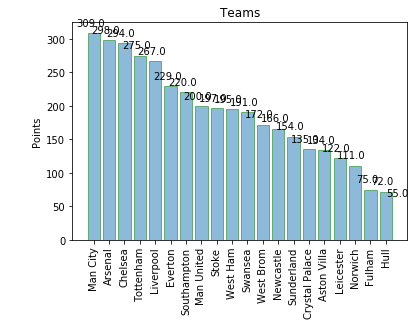

In [260]:
perf = list(bestTeam_overall.TotalPoints.head(20))
objs = list(bestTeam_overall.HomeTeam.head(20))

y_pos = np.arange(len(objs))


plt.autoscale(enable=True, axis='both', tight=None)

plt.bar(y_pos, perf, edgecolor='green', align='center', alpha=0.5)
plt.xticks(y_pos, objs, rotation=90)


plt.ylabel('Points')
plt.title('Teams')

for rect,label in zip(rects,labels):
    # Get X and Y placement of label from rect.
    y_value = label #rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    
# Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.


plt.show()

sns.pointplot(x="HomeTeam", y="TotalPoints", data=bestTeam_overall);

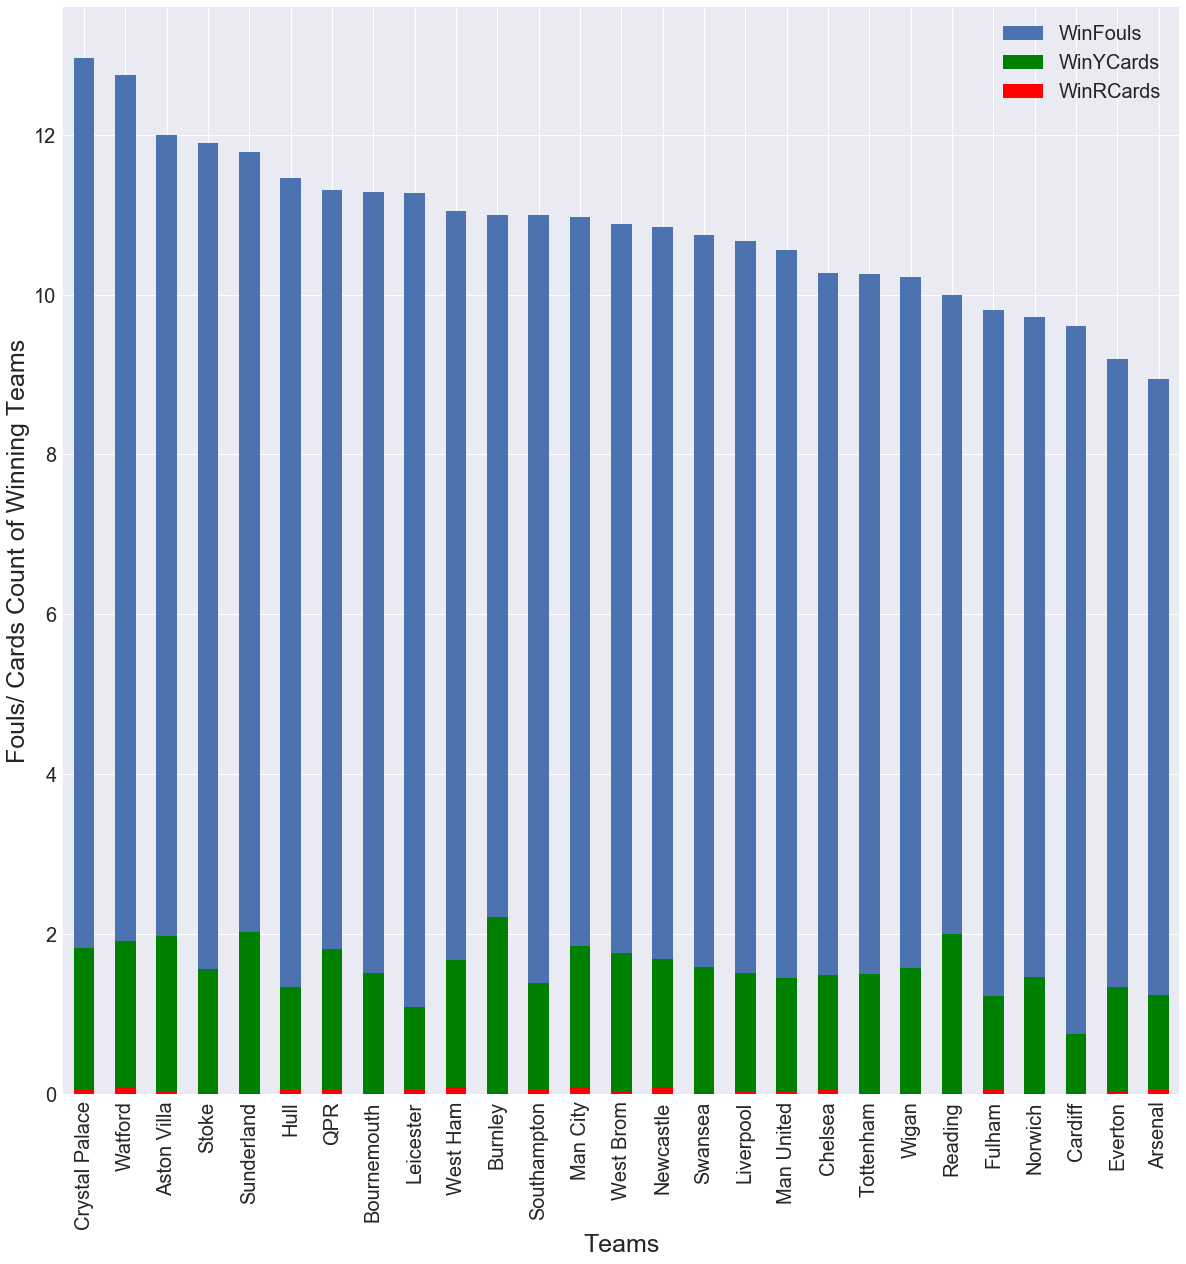

In [317]:
ax = maxFoulsWTeam.plot(x="Teams", y="WinFouls", kind="bar", fontsize=20, figsize=(20,20))
maxFoulsWTeam.plot(x="Teams", y="WinYCards", kind="bar", ax=ax, color="Green")
maxFoulsWTeam.plot(x="Teams", y="WinRCards", kind="bar", ax=ax, color="Red")

plt.legend(fontsize=20)

plt.legend(fontsize=20)
plt.xlabel("Teams",fontsize=25)
plt.ylabel("Fouls/ Cards Count of Winning Teams", fontsize=25)
plt.show()



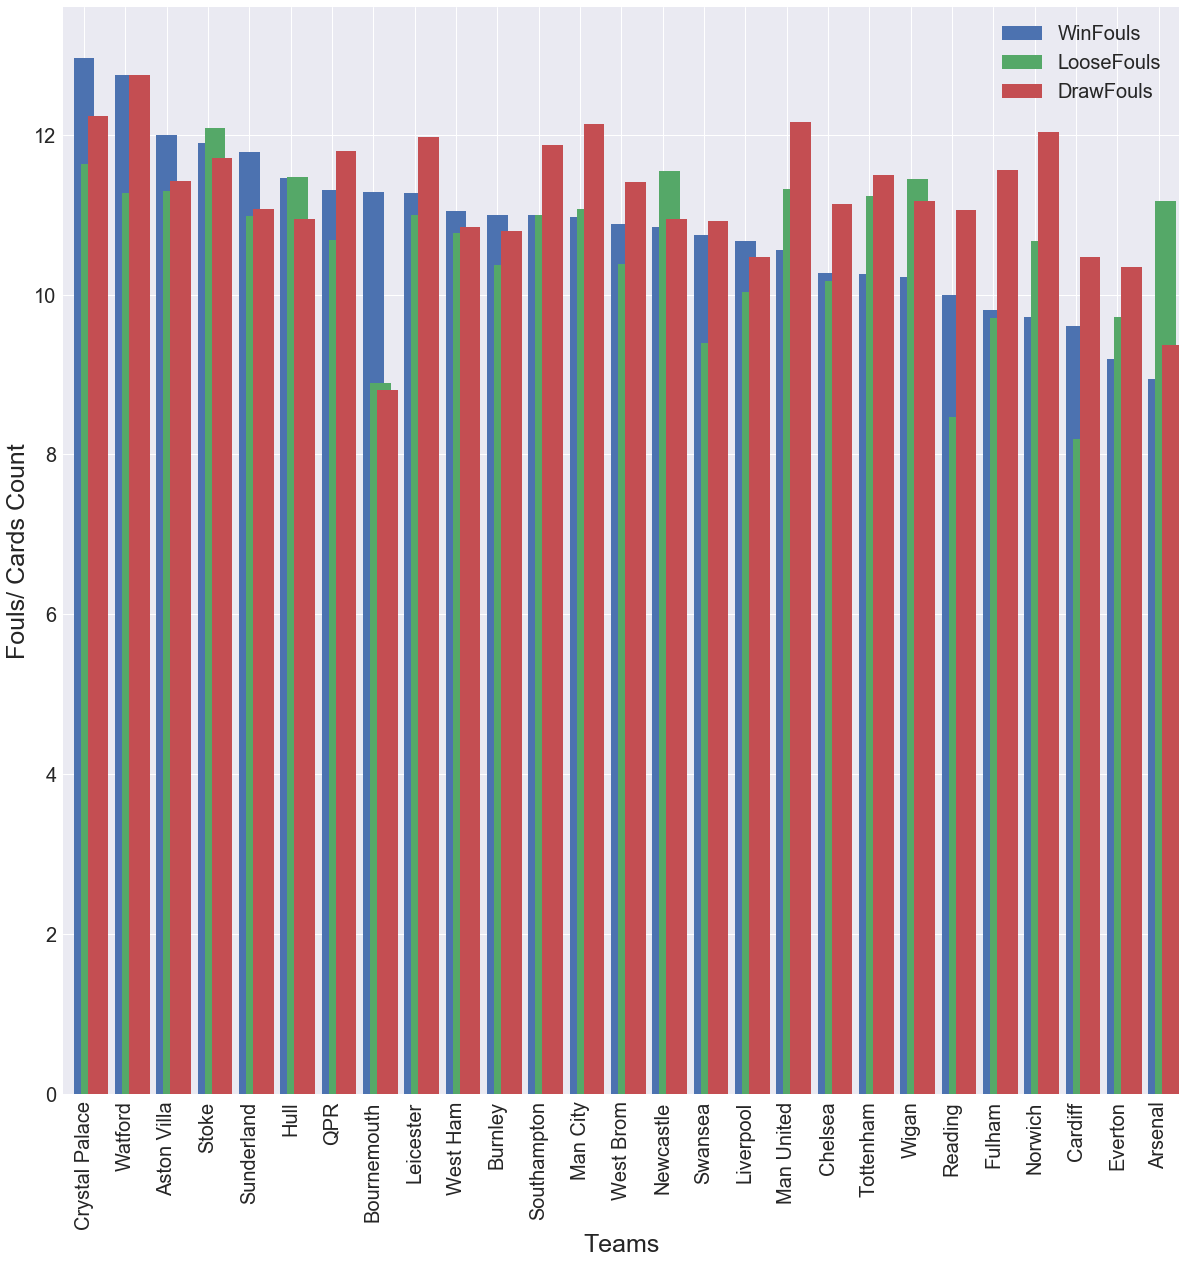

In [316]:
ax = maxFoulsWTeam.plot(x="Teams", y=["WinFouls","LooseFouls","DrawFouls" ], kind="bar", fontsize=20, figsize=(20,20))

for container in ax.containers:
              plt.setp(container, width=.5)

plt.legend(fontsize=20)
plt.xlabel("Teams",fontsize=25)
plt.ylabel("Fouls/ Cards Count", fontsize=25)
plt.show()

# Conclusion

<h1>Overall Summary</h1>

Total Unique teams: <b>28</b><br></br>
Total number of matches: <b>1521</b></br>

<ul><h3>Top 5 Teams:</h3>
    <li>Man City (309)</li>
    <li>Arsenal (298)</li>
    <li>Chelsea (294)</li>
    <li>Man United (289)</li>
    <li>Tottenham (275)</li>
    </ul>
    

<ul><h3>Bottom 5 Teams:</h3>
    <li>Reading  (28)</li>
    <li>Cardiff (30)</li>
    <li>Burnley (33)</li>
    <li>Wigan (36)</li>
    <li>Bournemouth  (42)</li>
    </ul>

<i>No. of matches when Home team wins <b>674</b> that is <b>~44%</b> times.</i>

<ul><h3>Top 5 Teams at Home:</h3>
    <li>Man City (180) </li>
    <li>Arsenal (163) </li>
    <li>Chelsea (162)</li>
    <li>Liverpool (149) </li>
    <li>Tottenham (143)</li>
    </ul>
    

<ul><h3>Bottom 5 Teams at Home:</h3>
    <li>Wigan (18) </li>
    <li>Burnley (19)</li>
    <li>Reading (20)</li>
    <li>Bournemouth (20)</li>
    <li>Cardiff (20) </li>
    </ul>
    

<ul><h3>Refrees:</h3>
 <li>M Atkinson Home wins 52 and Away wins 31 (top 5 for Away) Draw 29 (3rd in Draw category)</li>
 <li>M Dean home wins 51 Draw 37 (Tops the list)</li>
 <li>J Moss home wins 50</li>
 </ul>
    

<i>No. of matches when Away team wins <b>460</b> that is <b>~30% </b> times.</i>

<ul><h3>Top 5 Teams at Away:</h3>
    <li>Arsenal (135) </li>
    <li>Chelsea (132) </li>
    <li>Tottenham (132) </li>
    <li>Man City (129) </li>
    <li>Man United (126)</li>
    </ul>
<ul><h3>Bottom 5 Teams at Away:</h3>
    <li>Reading(8)</li>
    <li>Cardiff(10)</li>
    <li>Burnley(14)</li>
    <li>Wigan(18)</li>
    <li>QPR (18)</li>
    </ul>
    <ul><h3>Refrees:</h3>
    <li>A Taylor away wins 40</li>
    <li>M Clattenburg away wins 37</li>
    <li>K Friend away wins 34</li>
    </ul>
    
<i>No. of matches when there was no result, i.e., Match was Draw <b>386</b> that is <b>~25%</b> times</i>
    <ul><h3>Refree:</h3>
    <li>M Oliver Draw count 33</li>
    </ul>
    

<h2>Yearly Summary</h2>

<ul><h3>for 2012-13</h3>
    <li>Top 3 Teams
        <ol><li>Man City (78)</li>
        <li>Chelsea (75)</li>
        <li>Arsenal (73)</li>
        </ol></li>
    <li>Relegated Teams (bottom 3)
        <ol><li>QPR (25)</li>
        <li>Reading (28) </li>
        <li>Wigan (36)</li>
        </ol></li>
    <li>Top 3 Teams when Home
        <ol><li>Man City  (45) </li>
        <li>Everton  (42) </li>
        <li>Chelsea  (41)</li>
        </ol></li>
    <li>Top 3 Teams when Away
        <ol><li>Man United (41)</li>
        <li>Arsenal (35)</li>
        <li>Chelsea (34)</li>
        </ol></li>
        </ul>
        

        
<ul><h3>for 2013-14</h3>
    <li>
    Top 3 Teams
       <ol><li> Man City (86)</li>
       <li> Liverpool (84)</li>
        <li>Chelsea (82)</li>
        </ol></li>
    <li>Relegated Teams (bottom 3)
        <ol><li>Cardiff (30)</li>
        <li>Fulham (32)</li>
        <li>Norwich (33)</li>
        </ol></li>
    <li>Top 3 Teams when Home
        <ol><li>Man City  (52) </li>
        <li>Liverpool  (49) </li>
        <li>Chelsea  (48)</li>
        </ol></li>
    <li>Top 3 Teams when Away
        <ol><li>Arsenal (35)</li>
        <li>Liverpool (35)</li>
        <li>Chelsea (34)</li>
        </ol></li>
        </ul>
        

<ul><h3>for 2014-15</h3>
    <li>Top 3 Teams
       <ol><li> Chelsea (87)</li>
        <li>Man City (79)</li>
        <li>Arsenal (75)</li>
        </ol></li>
    <li>Relegated Teams (bottom 3)
        <ol><li>QPR (30)</li>
        <li>Burnley(33)</li>
        <li>Hull (35)</li>
        </ol></li>
    <li>Top 3 Teams when Home
        <ol><li>Chelsea  (49) </li>
        <li>Man City  (45) </li>
        <li>Man United  (44) </li>
        </ol></li>
    <li>Top 3 Teams when Away
        <ol><li>Chelsea  (38)</li>
        <li>Arsenal (34)</li>
        <li>Man City (34)</li>
        </ol></li>
        </ul>

<ul><h3>for 2015-16</h3>
    <li>Top 3 Teams
       <ol><li> Leicester (81)</li>
        <li>Arsenal (71)</li>
        <li>Tottenham (70)</li>
        </ol></li>
    <li>Relegated Teams (bottom 3)
       <ol><li> Aston Villa (17)</li>
       <li> Norwich (34)</li>
       <li> Newcastle (37)</li>
       </ol></li>
    <li>Top 3 Teams when Home
       <ol><li> Leicester  (42)</li> 
       <li> Man United  (41) </li>
        <li>Arsenal  (40)</li>
        </ol></li>
    <li>Top 3 Teams when Away
       <ol><li> Leicester  (39)</li>
       <li> Tottenham (34)</li>
       <li> Arsenal (31) </li>
       </ol></li>
       </ul>

<ul> Fouls
<li><b>Crystal Palace</b> commit max number of fouls, on an average gets a <b>Yellow Card</b> when <b>Wins</b> the match</li>
<li><b>Stoke</b> commit max number of fouls, on an average gets <b>2 Yellow Cards</b> when <b>looses</b> the match</li>
<li><b>Watford</b> commit max number of fouls, on an average gets <b>2 Yellow Cards</b> when <b>draws</b> the match</li>
</ul>
<UL> <b><I>Rafree</I></b>
<LI><b>M Dean</b> was Match Rafree for max number of Matches <b>(117)</b></LI>
<LI><b>S Hooper</b> was Match Rafree for min number of Matches <b>(1)</b></LI>
</UL>